In [1]:
# importing the required packages 

from skimage import io
import matplotlib.pyplot as plt
from skimage import segmentation
from skimage import color
import numpy as np

In [2]:
# reading the image 

image = io.imread('face_d2.jpg')

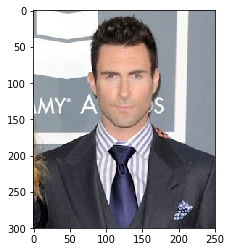

In [3]:
#displaying the image

plt.imshow(image)
plt.show()

In [4]:
# calling the slic mathod of the segmentation module in skimage
# Slic segments image using k-means clustering in Color-(x,y,z) space (source: http://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.slic)
# Slic returns an integer mask indicating segment labels

X = segmentation.slic(image, n_segments = 7)

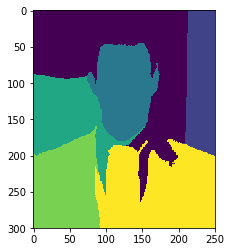

In [5]:
plt.imshow(X)
plt.show()

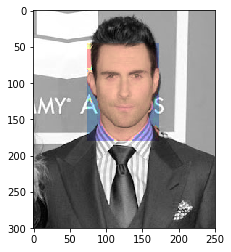

In [6]:
# finding the cluster number allocated to the face (dark green area in the centre)
n = X[125, 125]

# creating a mask for the face and using that to detect out the face in the original image

# finding the axis limits for the face, using its cluster value
x_face_loc = []
y_face_loc = []
i = 0
j = 0
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if X[i][j] == n:
            x_face_loc.append((i,j))
            y_face_loc.append((j,i))

# retrieving values of the minimum and maximum x and y coordinates for the face recognized in the image
x_min = min(x_face_loc)[0]
x_max = max(x_face_loc)[0]
y_min = min(y_face_loc)[0]
y_max = max(y_face_loc)[0]


# set a value for the transarency of the mask 
alpha = 0.35

rows, cols = X.shape

# construct a colour mask to superimpose later
mask = np.zeros((rows, cols, 3))
mask[x_min:x_max, y_min:y_max] = [1, 0, 0] # mask block with the ranges derived from x_face_loc and y_face_loc 

# convert the input image and color mask to Hue-Saturation-Value (HSV) colorspace format
# HSV doesn't get affected by the color component, only the intensity component 
hsv_image = color.rgb2hsv(image)
hsv_mask = color.rgb2hsv(mask)

# replace the saturation the image with that of the color mask, shade decided by the value of alpha 
# alpha = 0.35 seems like a good value, too much alpha makes it too red and too little makes the look faded out and pale. 
# alpha = 0.35 retains the natural elements of the original face
hsv_image[...,1] = hsv_mask[...,1] * alpha 

masked_image = color.hsv2rgb(hsv_image)

# the resulting image contains only the face with its original color retained
# everything else inside the mask is of a different color
# everything outside the mask is left in grayscale

# Display the image
plt.imshow(masked_image)
plt.show()